In [1]:
import mga
import mga.dataset

# For pie-chart plots
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 7)
sns.set()

In [ ]:
# mga.dataset.download_ml_small(force_download=True)
mga.dataset.download_ml_25m(force_download=True)

In [ ]:
mga.clean()

In [ ]:
!./cpp/generate ratings.mtx
# Creates edges.csv

In [2]:
movie_df = mga.pagerank(disable_progress_bar=False, symmetric=True)
movie_df.to_csv('movies_pr.csv')

Edges read
Graph generated
Edge count: 56090310
Vertex count: 20034
Density: 0.1398
Nodes with 0 incoming edges : 0
Nodes with 0 outgoing edges : 0
Classic pagerank completed
Teleport sets are created


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:44<00:00,  6.99s/it]


In [3]:
with open('genre.txt') as file:
    genre_set = set(line.strip() for line in file)
score_df = mga.get_genre_scores(movie_df, genre_set)

In [4]:
colors = sns.color_palette('tab20')
genre_lst = list(genre_set)
genre_lst.sort()
genre2color = {genre:colors[i] for i, genre in enumerate(genre_lst)}

def show_pie_chart(tmdb_id_lst):
    for tmdb_id in tmdb_id_lst:

        row = score_df[score_df['tmdb_id'] == tmdb_id].squeeze()

        title = row['title']
        genre_lst = []
        score_lst = []
        color_lst = []

        print(row['genres'])

        for genre in genre_set:
            score = row[genre]
            if score > 0:
                genre_lst.append(genre)
                score_lst.append(score)
                color_lst.append(genre2color[genre])

        plt.pie(score_lst, labels = genre_lst, colors=color_lst, autopct='%.1f%%')
        plt.title(title)
        plt.show()

Action|Adventure|Western


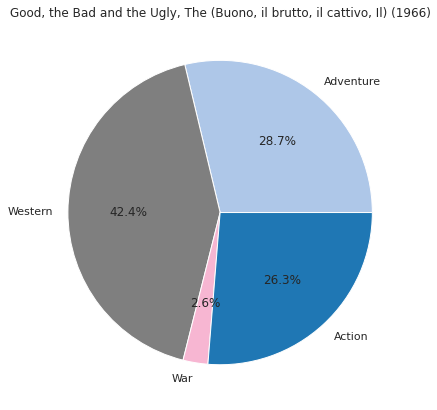

Drama|Sci-Fi


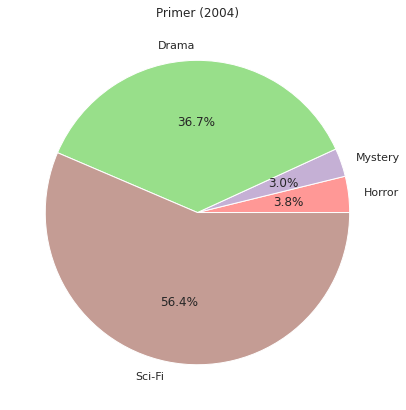

Action|Adventure|Horror|Sci-Fi


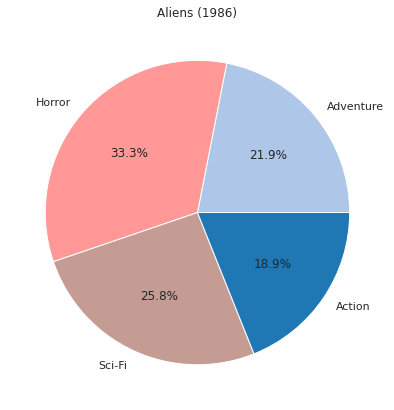

Mystery|Sci-Fi|Thriller


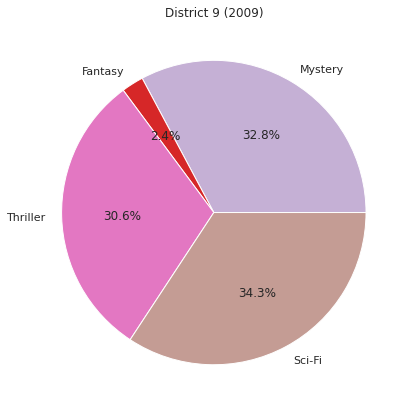

Comedy|Fantasy|Romance


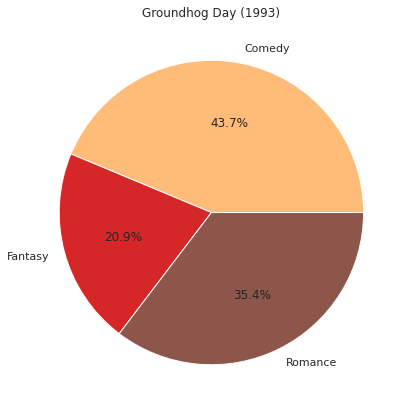

Drama|Sci-Fi|Thriller


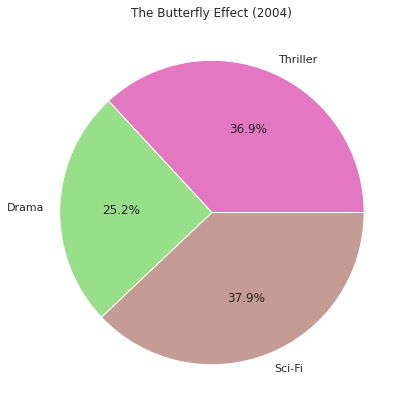

Horror|Sci-Fi


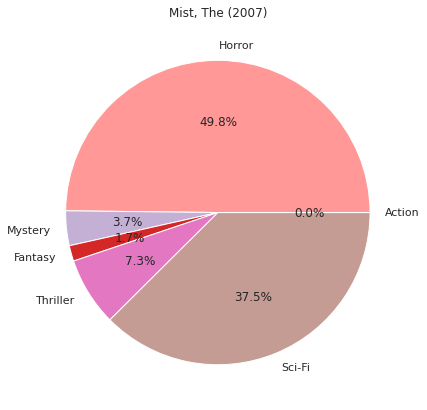

Adventure|Children|Fantasy


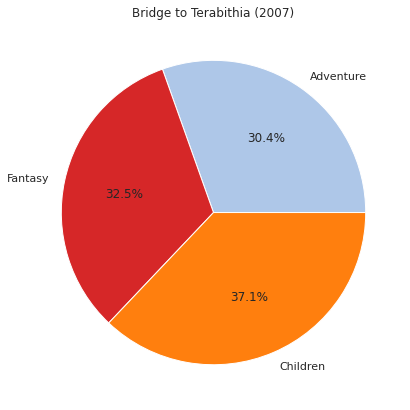

Drama


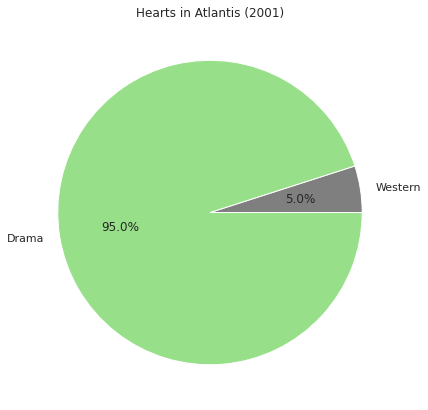

Sci-Fi|Thriller


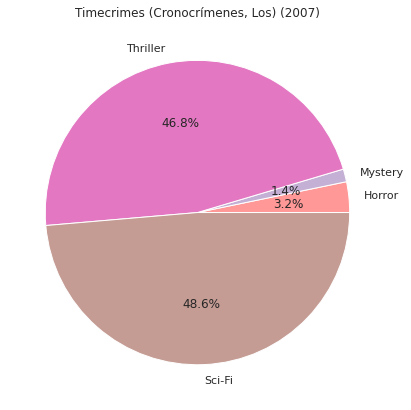

Comedy|Crime|Drama|Thriller


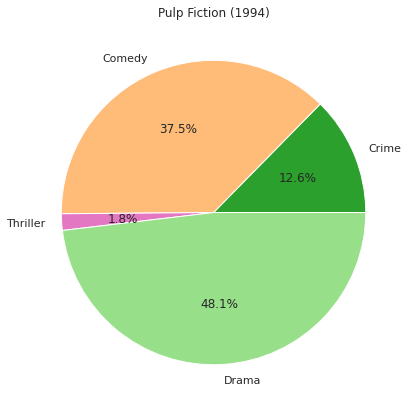

Comedy|Drama|Romance|War


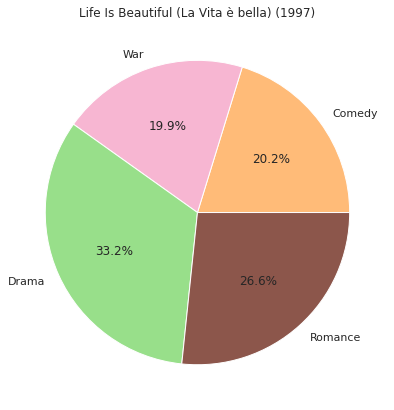

Adventure|Fantasy


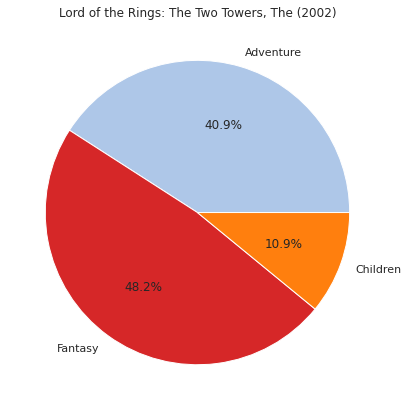

Adventure|Fantasy


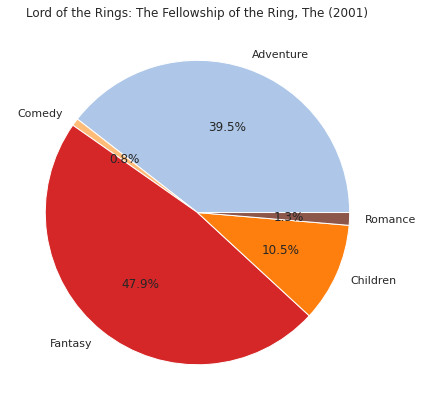

Action|Adventure|Drama|Fantasy


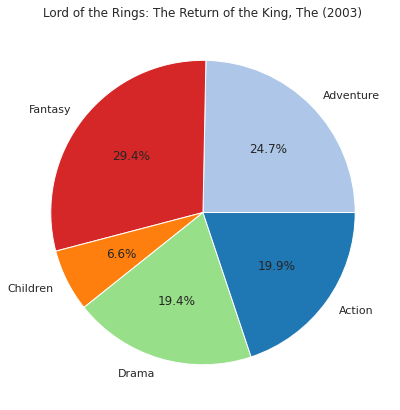

Crime|Drama


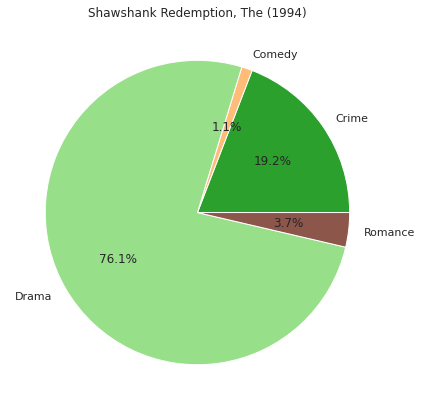

Action|Sci-Fi|Thriller


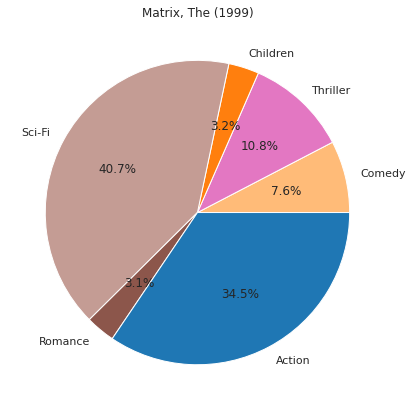

Comedy|Horror


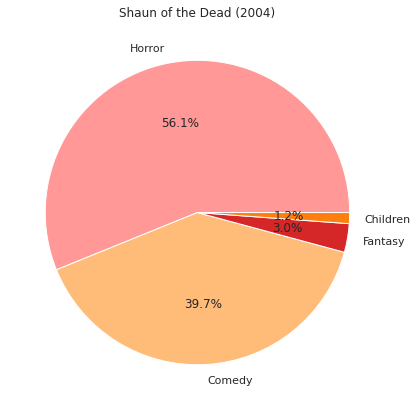

Drama|Fantasy|Romance


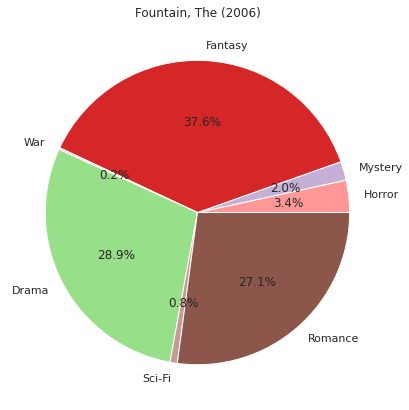

Comedy|Crime|Drama|Thriller


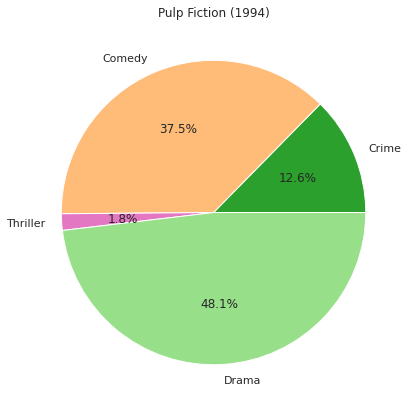

Action|Drama|Thriller


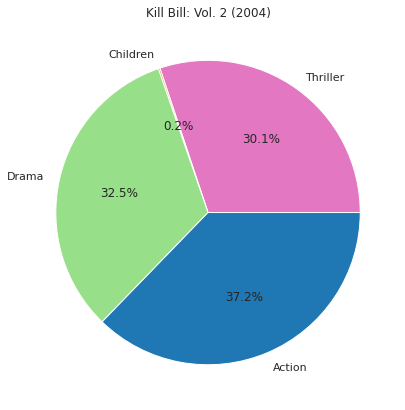

In [5]:
# Show Pie-chart plots of some movies

movie_lst = [429, 14337, 679, 17654, 137, 
             1954, 5876, 1265, 11313, 14139, 680, 
             637, 121, 120, 122, 278, 603, 747, 1381, 680, 393]

show_pie_chart(movie_lst)